In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
t, g =smp.symbols('t, g')

In [3]:
m1=1
m2=4
m3=2
m4=5
L1=1
L2=2
L3=1
L4=3
l=1
g = 9.81
k=5       #coupling constant

In [5]:
θ1, θ2, θ3, θ4 =smp.symbols(r'\theta_1, \theta_2, \theta_3, \theta_4', cls=smp.Function)

In [6]:
θ1=θ1(t)
θ2=θ2(t)
θ3=θ3(t)
θ4=θ4(t)

Defining derivatives and second derivatives

In [8]:
θ1_d = smp.diff(θ1,t)
θ2_d = smp.diff(θ2,t)
θ3_d = smp.diff(θ3,t)
θ4_d = smp.diff(θ4,t)
θ1_dd = smp.diff(θ1_d,t)
θ2_dd = smp.diff(θ2_d,t)
θ3_dd = smp.diff(θ3_d,t)
θ4_dd = smp.diff(θ4_d,t)

Defining $x_1,y_1,x_2$ and $y_2$ in terms of $\theta_1$ and $\theta_2$

In [10]:
x1 = L1*smp.sin(θ1)
y1 = -L1*smp.cos(θ1)
x2 = L1*smp.sin(θ1) + L2*smp.sin(θ2)
y2 = -L1*smp.cos(θ1) - L2*smp.cos(θ2)
x3 = l + L3*smp.sin(θ3)
y3 = -L3*smp.cos(θ3)
x4 = l + L3*smp.sin(θ3) + L4*smp.sin(θ4)
y4 = -L3*smp.cos(θ3) - L4*smp.cos(θ4)

### Defining Kinetic and Potential energy to get the Lagrangian
The Lagrangian is
$$L=T-V$$
where 
$$T=\frac{1}{2}m_1(\dot{x}_1^2+\dot{y}_1^2)+\frac{1}{2}m_2(\dot{x}_2^2+\dot{y}_2^2)+ \frac{1}{2}m_3(\dot{x}_3^2+\dot{y}_3^2)+\frac{1}{2}m_4(\dot{x}_4^2+\dot{y}_4^2) $$
and
$$V=m_1gy_1+m_2gy_2+\frac{1}{2}k\left( \sqrt{(x_1-x_3)^2+(y_1-y_3)^2}-l \right)^2$$

In [12]:
# Kinetic energy
T1 = 1/2 * m1 * (smp.diff(x1,t)**2 + smp.diff(y1,t)**2)
T2 = 1/2 * m2 * (smp.diff(x2,t)**2 + smp.diff(y2,t)**2)
T3 = 1/2 * m3 * (smp.diff(x3,t)**2 + smp.diff(y3,t)**2)
T4 = 1/2 * m4 * (smp.diff(x4,t)**2 + smp.diff(y4,t)**2)
T = T1+T2+T3+T4

#Potential Energy
V1 = m1*g*y1
V2 = m2*g*y2
V3 = m3*g*y3
V4 = m3*g*y4
V5 = 1/2 * k * (smp.sqrt((x1-x3)**2 + (y1-y2)**2) - l)**2
V = V1+V2+V3+V4+V5

#Lagrangian
L = T-V

### Euler Lagrange equations

$$\frac{\partial L}{\partial \theta_1}-\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_1}=0$$

$$\frac{\partial L}{\partial \theta_2}-\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_2}=0$$

$$\frac{\partial L}{\partial \theta_3}-\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_3}=0$$

$$\frac{\partial L}{\partial \theta_4}-\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_4}=0$$

In [13]:
#Deriving the LHS of Euler Lagrange equations
LE1 = smp.diff(L, θ1) - smp.diff(smp.diff(L, θ1_d), t).simplify()
LE2 = smp.diff(L, θ2) - smp.diff(smp.diff(L, θ2_d), t).simplify()
LE3 = smp.diff(L, θ3) - smp.diff(smp.diff(L, θ3_d), t).simplify()
LE4 = smp.diff(L, θ4) - smp.diff(smp.diff(L, θ4_d), t).simplify()

## Reducing eom in the form
$$\frac{d^2}{dt^2}\theta_1= ...$$
$$\frac{d^2}{dt^2}\theta_2= ...$$
$$\frac{d^2}{dt^2}\theta_3= ...$$
$$\frac{d^2}{dt^2}\theta_4= ...$$
where the RHS depends of derivatives of order less than 2.

In [14]:
sols = smp.solve([LE1, LE2, LE3, LE4], (θ1_dd, θ2_dd, θ3_dd, θ4_dd), simplify=False, rational=False)

In [15]:
# dz1dt_f = smp.lambdify((t,g,m1,m2,m3,m4,L1,L2,L3,L4,θ1,θ2,θ3,θ4,θ1_d,θ2_d,θ3_d,θ4_d), sols[θ1_dd])
dω1dt_f = smp.lambdify((t,θ1,θ2,θ3,θ4,θ1_d,θ2_d,θ3_d,θ4_d), sols[θ1_dd])
dω2dt_f = smp.lambdify((t,θ1,θ2,θ3,θ4,θ1_d,θ2_d,θ3_d,θ4_d), sols[θ2_dd])
dω3dt_f = smp.lambdify((t,θ1,θ2,θ3,θ4,θ1_d,θ2_d,θ3_d,θ4_d), sols[θ3_dd])
dω4dt_f = smp.lambdify((t,θ1,θ2,θ3,θ4,θ1_d,θ2_d,θ3_d,θ4_d), sols[θ4_dd])

dθ1dt_f = smp.lambdify(θ1_d, θ1_d)
dθ2dt_f = smp.lambdify(θ2_d, θ2_d)
dθ3dt_f = smp.lambdify(θ3_d, θ3_d)
dθ4dt_f = smp.lambdify(θ4_d, θ4_d)

## Solving eom

In [16]:
def dSdt(S, t):
    θ1, ω1, θ2, ω2, θ3, ω3, θ4, ω4 = S
    return [dθ1dt_f(ω1),
           dω1dt_f(t,θ1,θ2,θ3,θ4,ω1,ω2,ω3,ω4),
           dθ2dt_f(ω2),
           dω2dt_f(t,θ1,θ2,θ3,θ4,ω1,ω2,ω3,ω4),
           dθ3dt_f(ω3),
           dω3dt_f(t,θ1,θ2,θ3,θ4,ω1,ω2,ω3,ω4),
           dθ4dt_f(ω4),
           dω4dt_f(t,θ1,θ2,θ3,θ4,ω1,ω2,ω3,ω4)]

In [17]:
%%time
t = np.linspace(0, 0.1, 1000)
dt = t[1]-t[0]

θ1_ini=160*np.pi/180
θ2_ini=175*np.pi/180
θ3_ini=-150*np.pi/180
θ4_ini=140*np.pi/180
δθ2=0.01*np.pi/180

sol1 = odeint(dSdt, y0=[θ1_ini,0,θ2_ini,0,θ3_ini,0,θ4_ini,0], t=t)
sol2 = odeint(dSdt, y0=[θ1_ini,0,θ2_ini+δθ2,0,θ3_ini,0,θ4_ini,0], t=t)
# inits=[77*np.pi/180,0,135*np.pi/180,0]
# sol_ivp=solve_ivp(CDE, t_span=[0, 25], y0=inits, method='RK45', t_eval=t)

CPU times: user 2.46 s, sys: 3.96 ms, total: 2.47 s
Wall time: 2.47 s


In [18]:
θa1_t = sol1.T[0]
ωa1_t = sol1.T[1]
θa2_t = sol1.T[2]
ωa2_t = sol1.T[3]
θa3_t = sol1.T[4]
ωa3_t = sol1.T[5]
θa4_t = sol1.T[6]
ωa4_t = sol1.T[7]

θb1_t = sol2.T[0]
ωb1_t = sol2.T[1]
θb2_t = sol2.T[2]
ωb2_t = sol2.T[3]
θb3_t = sol2.T[4]
ωb3_t = sol2.T[5]
θb4_t = sol2.T[6]
ωb4_t = sol2.T[7]

In [19]:
Δθ= np.sqrt((θb1_t-θa1_t)**2 + (θb2_t-θa2_t)**2 + (θb3_t-θa3_t)**2 + (θb4_t-θa4_t)**2 + (ωb1_t-ωa1_t)**2 + (ωb2_t-ωa2_t)**2 + (ωb3_t-ωa3_t)**2 + (ωb4_t-ωa4_t)**2)*180/np.pi 

## Typical separtion of $\theta$'s

In [20]:
# plt.figure(figsize=(10,3))
# plt.plot(t, θa1_t*180/np.pi,label='$θ_1$')
# plt.plot(t, θb1_t*180/np.pi,label='$θ_1$ after perturbation')
# plt.xlabel(r'θ\degree')
# plt.title(r'$θ_1=160\degree,θ_2=175\degree,θ_3=-150\degree,θ_4=140\degree,\delta θ=5\degree,k=5 $')
# plt.xlabel('t')
# plt.ylabel('θ$\degree$')
# plt.legend()
# plt.grid()

In [21]:
# plt.figure(figsize=(10,3))
# plt.plot(t, θa2_t*180/np.pi,label='$θ_2$')
# plt.plot(t, θb2_t*180/np.pi,label='$θ_2$ after perturbation')
# plt.xlabel(r'θ\degree')
# plt.title(r'$θ_1=160\degree,θ_2=175\degree,θ_3=-150\degree,θ_4=140\degree,\delta θ=5\degree,k=5 $')
# plt.xlabel('t')
# plt.ylabel('θ$\degree$')
# plt.legend()
# plt.grid()

In [22]:
# plt.figure(figsize=(10,3))
# plt.plot(t, θa3_t*180/np.pi,label='$θ_3$')
# plt.plot(t, θb3_t*180/np.pi,label='$θ_3$ after perturbation')
# plt.xlabel(r'θ\degree')
# plt.title(r'$θ_1=160\degree,θ_2=175\degree,θ_3=-150\degree,θ_4=140\degree,\delta θ=5\degree,k=5 $')
# plt.xlabel('t')
# plt.ylabel('θ$\degree$')
# plt.legend()
# plt.grid()

In [23]:
# plt.figure(figsize=(10,3))
# plt.plot(t, θa4_t*180/np.pi,label='$θ_4$')
# plt.plot(t, θb4_t*180/np.pi,label='$θ_4$ after perturbation')
# plt.xlabel(r'θ\degree')
# plt.title(r'$θ_1=160\degree,θ_2=175\degree,θ_3=-150\degree,θ_4=140\degree,\delta θ=5\degree,k=5 $')
# plt.xlabel('t')
# plt.ylabel('θ$\degree$')
# plt.legend()
# plt.grid()

## Lyapunov exponent

In [24]:
λ, A=np.polyfit(t,np.log(Δθ),1)

In [25]:
np.exp(A)

0.009578785310894958

In [26]:
fit=np.exp(A)*np.exp(λ*t)

In [27]:
λ

7.7639468861913405

In [28]:
MSE=(1/len(t))*np.sum((fit-Δθ)**2)

In [29]:
MSE

1.1124918728496937e-07

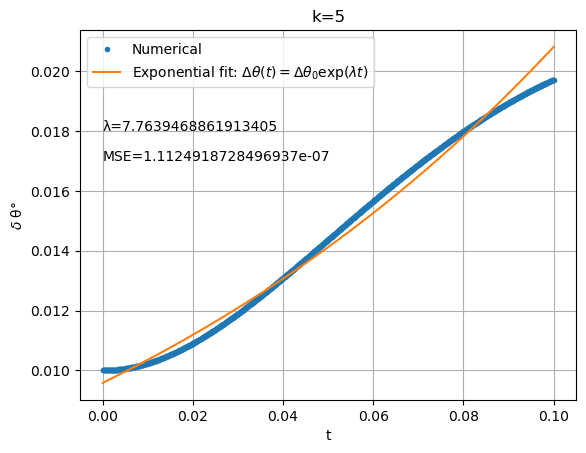

In [36]:
plt.plot(t, Δθ,'.',label='Numerical')
plt.plot(t, fit, label='Exponential fit: $\Delta θ(t)=\Delta θ_0\exp(\lambda t)$')
plt.xlabel('t')
plt.ylabel('$\delta$ θ$\degree$')
plt.text(0,0.018, 'λ='+str(λ), fontsize = 10)
plt.text(0,0.017, 'MSE='+str(MSE), fontsize = 10)
plt.title('k='+str(k))
plt.grid()
plt.legend()
plt.show()